## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import matplotlib.offsetbox as offsetbox

## Load dataset

In [13]:
df = pd.read_csv('final_dataset_libRosa.csv')
df

,filename,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_flatness_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,sample-DTRANDOM_019-17.mp3,0.350708,0.069019,1288.324193,1247.510388,1.746752e-05,2710.193569,0.075772,0.004766,1.188932,...,0.535796,-7.972987,3.388866,-6.693220,0.803928,-5.326388,-0.168157,3.101068,-8.477371,Christmas
1,sample-POWERTRK_125-02.mp3,0.299046,0.115830,1047.105537,1027.451332,1.071855e-06,2167.592027,0.056526,0.000002,3.532243,...,-6.226001,-8.769749,2.304156,-10.252484,1.493816,4.525695,-6.645535,-0.560083,-2.865374,Christmas
2,sample-XMSELECT_GOF-13.mp3,0.288667,0.150843,816.005684,805.936869,2.346233e-07,1560.240118,0.054296,0.000003,6.014281,...,-10.194740,1.660949,-5.116822,-2.958234,-2.612553,-6.975340,-5.341919,-7.551659,-6.381026,Christmas
3,sample-DTRANDOM_013-07.mp3,0.403505,0.167301,1504.790368,1249.473961,3.350403e-06,3045.632185,0.098689,-0.000003,6.097296,...,2.759302,-6.976521,2.498942,-7.672327,-7.714619,-4.330679,-4.721737,1.241852,-3.279220,Christmas
4,sample-XMHIPHOL_003-10.mp3,0.258884,0.089275,1089.915357,1161.784795,2.399726e-06,2186.334548,0.058453,0.000003,2.298109,...,-3.318206,-7.122634,-2.548867,-14.786513,-5.416527,-6.107085,-1.916261,10.534351,6.146411,Christmas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,fma_medium/044/044276.mp3,0.476525,0.329769,2742.967580,2581.796312,4.248577e-02,5616.094192,0.135448,-0.000007,22.841244,...,1.156157,-5.180380,2.518645,-2.207259,4.115306,-6.023543,-2.001541,-4.123478,-1.567553,Rock
4796,fma_medium/042/042310.mp3,0.288321,0.053091,1054.869458,1500.370243,8.557623e-04,1627.880180,0.046666,-0.000002,0.767574,...,-9.031524,-11.199783,0.124784,-7.767900,-3.835973,-0.617304,-1.356593,-5.348435,-4.876389,Rock
4797,fma_medium/075/075684.mp3,0.459228,0.244995,2575.931676,2360.155966,2.985728e-02,4979.203495,0.138606,0.000001,12.114441,...,12.602077,3.929322,2.159229,-0.653278,2.018915,-7.176326,-4.395039,-0.766853,3.896666,Rock
4798,fma_medium/099/099417.mp3,0.409426,0.235590,2237.418950,2426.497249,2.692726e-02,4819.940228,0.106360,0.000001,12.898632,...,2.486997,-5.353449,-3.585785,-3.449418,0.031969,-2.342832,-3.214798,-2.025557,2.940305,Rock


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 4800 non-null   object 
 1   chroma_stft_mean         4800 non-null   float64
 2   rms_mean                 4800 non-null   float64
 3   spectral_centroid_mean   4800 non-null   float64
 4   spectral_bandwidth_mean  4800 non-null   float64
 5   spectral_flatness_mean   4800 non-null   float64
 6   rolloff_mean             4800 non-null   float64
 7   zero_crossing_rate_mean  4800 non-null   float64
 8   harmony_mean             4800 non-null   float64
 9   perceptr_mean            4800 non-null   float64
 10  tempo                    4800 non-null   float64
 11  mfcc1_mean               4800 non-null   float64
 12  mfcc2_mean               4800 non-null   float64
 13  mfcc3_mean               4800 non-null   float64
 14  mfcc4_mean              

In [4]:
df.isnull().sum()

filename                   0
chroma_stft_mean           0
rms_mean                   0
spectral_centroid_mean     0
spectral_bandwidth_mean    0
spectral_flatness_mean     0
rolloff_mean               0
zero_crossing_rate_mean    0
harmony_mean               0
perceptr_mean              0
tempo                      0
mfcc1_mean                 0
mfcc2_mean                 0
mfcc3_mean                 0
mfcc4_mean                 0
mfcc5_mean                 0
mfcc6_mean                 0
mfcc7_mean                 0
mfcc8_mean                 0
mfcc9_mean                 0
mfcc10_mean                0
mfcc11_mean                0
mfcc12_mean                0
mfcc13_mean                0
mfcc14_mean                0
mfcc15_mean                0
mfcc16_mean                0
mfcc17_mean                0
mfcc18_mean                0
mfcc19_mean                0
mfcc20_mean                0
label                      0
dtype: int64

In [5]:
df.describe()

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_flatness_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
count,4800.000000,4800.000000,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,0.360900,0.160722,1666.676936,1735.231873,8.862065e-03,3370.427137,0.084184,1.487226e-04,8.261653,121.848186,...,-2.000764,-0.350629,-4.801484,1.858263,-5.443525,1.398611,-3.289003,-1.327589,-0.511601,-2.663323
std,0.090422,0.089276,646.331690,598.843515,2.303900e-02,1414.314234,0.039162,1.320073e-02,8.387859,21.026423,...,8.221610,6.620030,6.322911,7.177006,6.047980,6.170671,5.607478,5.007546,6.257868,6.233243
min,0.000000,0.000000,0.000000,0.000000,1.228387e-07,0.000000,0.000000,-4.464204e-01,0.000000,61.523438,...,-48.153893,-30.411228,-35.566956,-27.800838,-35.008526,-28.661312,-33.872074,-24.456800,-27.618715,-25.255730
25%,0.291667,0.092315,1245.641595,1304.122520,5.872132e-06,2406.933938,0.057708,-7.904418e-06,2.225904,107.666016,...,-7.154121,-3.982525,-8.480304,-2.627887,-9.486508,-2.540521,-6.555704,-4.557371,-4.876534,-6.993864
50%,0.355857,0.148199,1564.272432,1587.958224,1.376873e-03,3176.440437,0.079266,-3.866989e-07,5.576141,123.046875,...,-1.916385,0.295238,-4.628566,1.883048,-5.298202,1.632544,-3.489510,-1.336751,-0.984658,-2.326829
75%,0.421726,0.218812,2013.103655,2214.711545,1.110086e-02,4187.880139,0.104623,4.412362e-06,11.958456,135.999178,...,3.425662,4.075777,-0.875637,6.529205,-1.533294,5.322877,-0.531156,1.899019,3.749523,1.364532
max,0.772570,0.793475,7798.457022,3413.083109,1.000001e+00,10047.212718,0.646905,2.892833e-01,95.959150,198.768029,...,22.209118,23.684790,23.232569,27.179447,28.927948,29.757423,31.095617,27.893942,23.528032,30.680508


In [6]:
from sklearn.preprocessing import StandardScaler

# Dropping the 'filename' column
df_cleaned = df.drop(columns=['filename'])

# Separating features and target variable
X = df_cleaned.drop(columns=['label'])
y = df_cleaned['label']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features back to DataFrame for easy manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [7]:
X_scaled_df

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_flatness_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,-0.112722,-1.027301,-0.585446,-0.814524,-0.383937,-0.466871,-0.214810,0.349834,-0.843297,1.434102,...,0.402290,0.133914,-0.501641,0.213287,-0.206652,-0.096382,-0.363371,0.231561,0.577360,-0.932846
1,-0.684130,-0.502904,-0.958697,-1.182035,-0.384648,-0.850561,-0.706328,-0.011092,-0.563899,0.349646,...,0.590031,-0.887607,-0.627666,0.062134,-0.795217,0.015430,1.393766,-1.062097,-0.007748,-0.032418
2,-0.798927,-0.110669,-1.316290,-1.551978,-0.384685,-1.280038,-0.763278,-0.011038,-0.267959,0.349646,...,-1.392263,-1.487174,1.022173,-0.971967,0.410972,-0.650105,-0.657465,-0.801740,-1.125110,-0.596494
3,0.471238,0.073698,-0.250496,-0.811245,-0.384549,-0.229672,0.370408,-0.011469,-0.258061,-0.209014,...,-0.788202,0.469825,-0.344029,0.089278,-0.368558,-1.477016,-0.185785,-0.677877,0.280229,-0.098819
4,-1.128340,-0.800385,-0.892455,-0.957691,-0.384591,-0.837308,-0.657097,-0.011077,-0.711047,0.057015,...,0.374888,-0.448319,-0.367140,-0.614126,-1.544972,-1.104555,-0.502610,-0.117569,1.765314,1.413494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,1.278869,1.893737,1.665403,1.413813,1.459577,1.587979,1.309143,-0.011819,1.738359,-0.674563,...,0.062690,0.227634,-0.059931,0.092023,0.535154,0.440305,-0.487710,-0.134601,-0.577234,0.175813
4796,-0.802750,-1.205726,-0.946683,-0.392233,-0.347547,-1.232207,-0.958117,-0.011430,-0.893537,0.673080,...,0.438814,-1.311444,-1.012028,-0.241557,-0.384362,-0.848389,0.476503,-0.005793,-0.773001,-0.355079
4797,1.087548,0.944064,1.406939,1.043660,0.911385,1.137614,1.389804,-0.011174,0.459377,-1.243568,...,0.160530,1.956797,1.380965,0.041939,0.792123,0.100535,-0.693311,-0.612629,-0.040793,1.052530
4798,0.536726,0.838703,0.883140,1.154454,0.784195,1.024994,0.566312,-0.011175,0.552878,-0.209014,...,-0.171129,0.428687,-0.087305,-0.758619,0.329749,-0.221497,0.168751,-0.376912,-0.241954,0.899084


In [8]:
from scipy import stats
import numpy as np

# Identifying outliers using Z-scores (threshold of 3 standard deviations)
z_scores = np.abs(stats.zscore(X_scaled_df))
outliers = (z_scores > 3).any(axis=1)

# Filtering out the outliers from the dataset
X_no_outliers = X_scaled_df[~outliers]
y_no_outliers = y[~outliers]

# Checking the shape to confirm outliers were removed
X_no_outliers.shape, y_no_outliers.shape

((4262, 30), (4262,))

In [9]:
X_no_outliers

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,spectral_flatness_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,-0.112722,-1.027301,-0.585446,-0.814524,-0.383937,-0.466871,-0.214810,0.349834,-0.843297,1.434102,...,0.402290,0.133914,-0.501641,0.213287,-0.206652,-0.096382,-0.363371,0.231561,0.577360,-0.932846
1,-0.684130,-0.502904,-0.958697,-1.182035,-0.384648,-0.850561,-0.706328,-0.011092,-0.563899,0.349646,...,0.590031,-0.887607,-0.627666,0.062134,-0.795217,0.015430,1.393766,-1.062097,-0.007748,-0.032418
2,-0.798927,-0.110669,-1.316290,-1.551978,-0.384685,-1.280038,-0.763278,-0.011038,-0.267959,0.349646,...,-1.392263,-1.487174,1.022173,-0.971967,0.410972,-0.650105,-0.657465,-0.801740,-1.125110,-0.596494
3,0.471238,0.073698,-0.250496,-0.811245,-0.384549,-0.229672,0.370408,-0.011469,-0.258061,-0.209014,...,-0.788202,0.469825,-0.344029,0.089278,-0.368558,-1.477016,-0.185785,-0.677877,0.280229,-0.098819
4,-1.128340,-0.800385,-0.892455,-0.957691,-0.384591,-0.837308,-0.657097,-0.011077,-0.711047,0.057015,...,0.374888,-0.448319,-0.367140,-0.614126,-1.544972,-1.104555,-0.502610,-0.117569,1.765314,1.413494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,1.278869,1.893737,1.665403,1.413813,1.459577,1.587979,1.309143,-0.011819,1.738359,-0.674563,...,0.062690,0.227634,-0.059931,0.092023,0.535154,0.440305,-0.487710,-0.134601,-0.577234,0.175813
4796,-0.802750,-1.205726,-0.946683,-0.392233,-0.347547,-1.232207,-0.958117,-0.011430,-0.893537,0.673080,...,0.438814,-1.311444,-1.012028,-0.241557,-0.384362,-0.848389,0.476503,-0.005793,-0.773001,-0.355079
4797,1.087548,0.944064,1.406939,1.043660,0.911385,1.137614,1.389804,-0.011174,0.459377,-1.243568,...,0.160530,1.956797,1.380965,0.041939,0.792123,0.100535,-0.693311,-0.612629,-0.040793,1.052530
4798,0.536726,0.838703,0.883140,1.154454,0.784195,1.024994,0.566312,-0.011175,0.552878,-0.209014,...,-0.171129,0.428687,-0.087305,-0.758619,0.329749,-0.221497,0.168751,-0.376912,-0.241954,0.899084


## Split data

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the cleaned dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3409, 30), (853, 30), (3409,), (853,))

In [11]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Asegúrate de que X_train y X_test sean arrays de NumPy o DataFrames de pandas
X_train = np.array(X_train).astype(float)  # o pd.DataFrame(X_train)
X_test = np.array(X_test).astype(float)    # o pd.DataFrame(X_test)

# Definiendo modelos
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Diccionario para almacenar resultados
results = []

# Entrenando y evaluando cada modelo
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Calcular precisión y matriz de confusión
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Almacenar resultados
    results.append((model_name, accuracy, conf_matrix))

# Mostrando resultados
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Confusion Matrix"])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
results_df

,Model,Accuracy,Confusion Matrix
1,Random Forest,0.533411,"[[42, 0, 14, 0, 0, 0, 0, 0, 0, 15, 0, 0, 5, 2,..."
3,Neural Network (MLP),0.507620,"[[40, 1, 11, 0, 0, 0, 0, 1, 0, 17, 0, 0, 6, 2,..."
2,Support Vector Machine,0.499414,"[[35, 1, 14, 0, 0, 0, 0, 0, 0, 22, 0, 0, 4, 2,..."
0,K-Nearest Neighbors,0.444314,"[[43, 1, 13, 0, 0, 0, 0, 1, 0, 12, 0, 0, 8, 0,..."


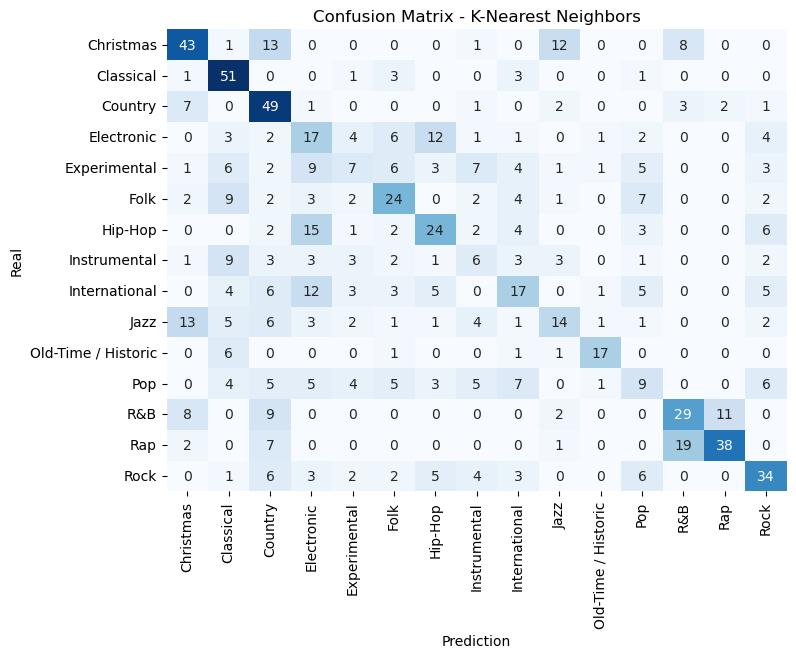

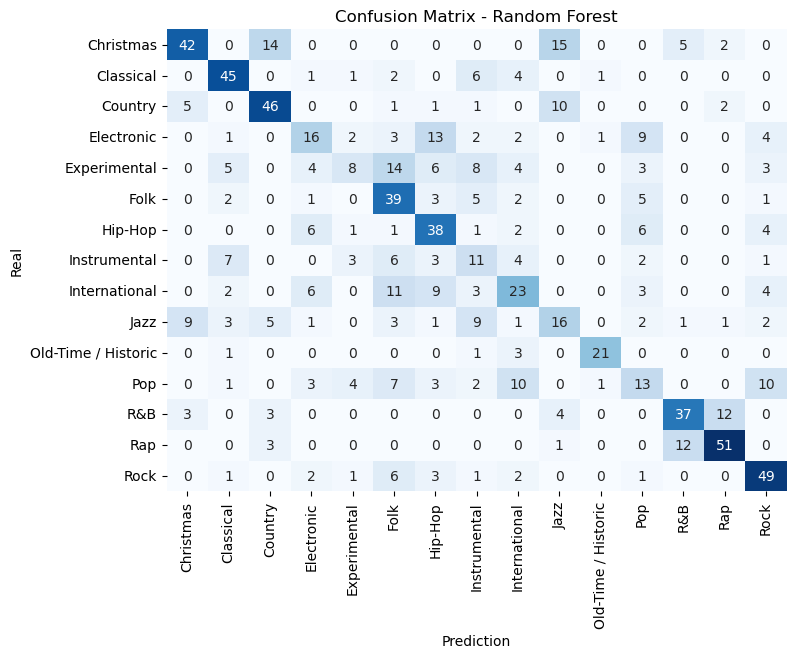

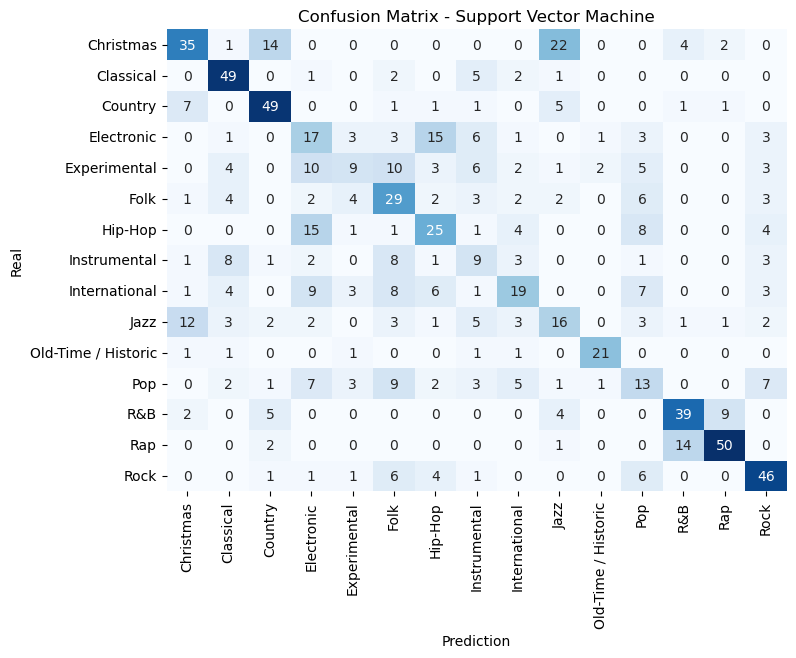

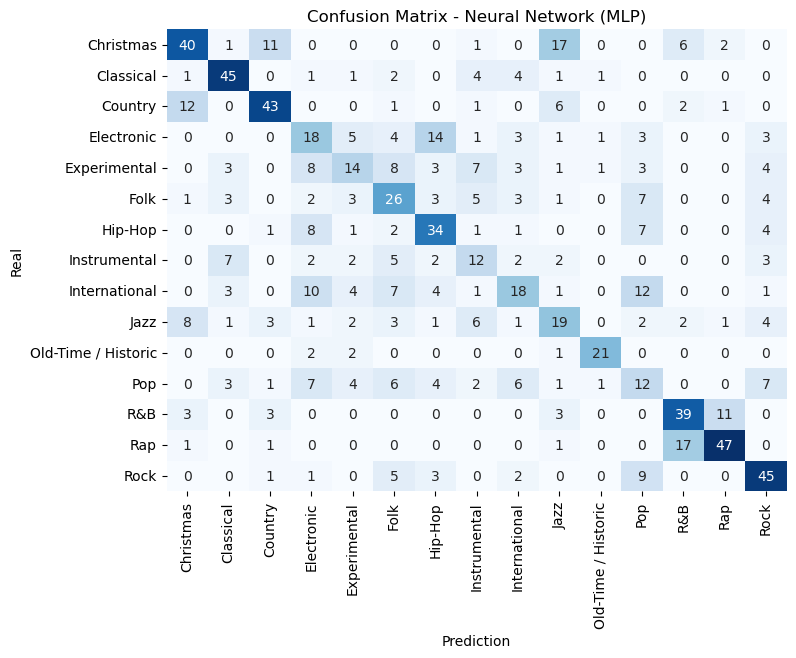

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediction')
    plt.ylabel('Real')
    plt.show()

# Graficar la matriz de confusión para cada modelo
for model_name, accuracy, conf_matrix in results:
    plot_confusion_matrix(conf_matrix, model_name)

In [21]:
import librosa
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier

# 1. Función para extraer características del archivo de audio
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    rms = librosa.feature.rms(y=y).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_flatness = librosa.feature.spectral_flatness(y=y).mean()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()
    harmony = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).mean()
    perceptr = librosa.feature.spectral_contrast(y=y, sr=sr).mean()
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = mfccs.mean(axis=1)
    features = np.array([chroma_stft, rms, spectral_centroid, spectral_bandwidth, spectral_flatness,
                         rolloff, zero_crossing_rate, harmony, perceptr, tempo] + list(mfccs_mean))
    return features

# 2. Entrenar el modelo de Random Forest
# Asumiendo que X_scaled y y_encoded ya están definidos en tu notebook
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Guardar el modelo entrenado
joblib.dump(model, 'music_genre_classifier_rf.pkl')
print("Modelo guardado como 'music_genre_classifier_rf.pkl'.")

# Para cargar y usar el modelo en tu app
# model = joblib.load('music_genre_classifier_rf.pkl')
# genre = model.predict([extract_features('ruta/al/archivo.mp3')])[0]


Modelo guardado como 'music_genre_classifier_rf.pkl'.


In [19]:
import librosa
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier

# Function to extract features from an audio file using Librosa
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extracting features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    rms = librosa.feature.rms(y=y).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_flatness = librosa.feature.spectral_flatness(y=y).mean()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()
    harmony = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).mean()
    perceptr = librosa.feature.spectral_contrast(y=y, sr=sr).mean()
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    # Extracting MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = mfccs.mean(axis=1)
    
    # Concatenating all features into a single feature vector
    features = np.array([chroma_stft, rms, spectral_centroid, spectral_bandwidth, spectral_flatness,
                         rolloff, zero_crossing_rate, harmony, perceptr, tempo] + list(mfccs_mean))
    return features

# Function to train and save the Random Forest model
def train_and_save_model(X, y, model_path='music_genre_classifier_rf.pkl'):
    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Save the model to a file
    joblib.dump(model, model_path)
    print(f"Model saved to {model_path}")

# Saving functions to a Python file for the app
model_code = """
import librosa
import numpy as np
import joblib

# Load the saved model
model = joblib.load('music_genre_classifier_rf.pkl')

# Function to extract features from an audio file using Librosa
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    rms = librosa.feature.rms(y=y).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_flatness = librosa.feature.spectral_flatness(y=y).mean()
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()
    harmony = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).mean()
    perceptr = librosa.feature.spectral_contrast(y=y, sr=sr).mean()
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = mfccs.mean(axis=1)
    features = np.array([chroma_stft, rms, spectral_centroid, spectral_bandwidth, spectral_flatness,
                         rolloff, zero_crossing_rate, harmony, perceptr, tempo] + list(mfccs_mean))
    return features

# Prediction function
def predict_genre(audio_path):
    features = extract_features(audio_path).reshape(1, -1)
    genre = model.predict(features)
    return genre[0]
"""

# Writing the model code to a .py file for app integration
with open('/mnt/data/music_genre_classifier.py', 'w') as f:
    f.write(model_code)

'/mnt/data/music_genre_classifier.py'


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/music_genre_classifier.py'

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset (make sure to upload the CSV file in Colab)
file_path = 'final_dataset_libRosa.csv'  # Replace with your actual path if needed
dataset = pd.read_csv(file_path)

# Preprocess the data
X = dataset.drop(columns=['filename', 'label'])
y = dataset['label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert the labels to categorical format
y_train_categorical = np.eye(len(label_encoder.classes_))[y_train]
y_test_categorical = np.eye(len(label_encoder.classes_))[y_test]

# Build the ANN model
model_ann = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_ann = model_ann.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model_ann.evaluate(X_test, y_test_categorical)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1707 - loss: 2.5106 - val_accuracy: 0.3945 - val_loss: 1.7826
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3076 - loss: 1.9309 - val_accuracy: 0.4310 - val_loss: 1.6297
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3618 - loss: 1.7479 - val_accuracy: 0.4544 - val_loss: 1.5556
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3660 - loss: 1.7388 - val_accuracy: 0.4609 - val_loss: 1.5204
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4055 - loss: 1.6492 - val_accuracy: 0.4674 - val_loss: 1.4908
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4311 - loss: 1.6248 - val_accuracy: 0.4701 - val_loss: 1.4587
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4254 - loss: 1.6031 - val_accuracy: 0.4792 - val_loss: 1.4447
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4491 - loss: 1.5171 - val_accuracy: 0.4909 - val_loss:

In [2]:
# Import necessary libraries for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape X_train and X_test to fit into the Conv1D layer
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_categorical)
print(f"Test Loss (CNN): {loss_cnn}")
print(f"Test Accuracy (CNN): {accuracy_cnn}")

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1763 - loss: 2.4693 - val_accuracy: 0.3711 - val_loss: 1.8726
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3393 - loss: 1.9554 - val_accuracy: 0.4167 - val_loss: 1.6977
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3685 - loss: 1.7640 - val_accuracy: 0.4323 - val_loss: 1.6056
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4111 - loss: 1.7181 - val_accuracy: 0.4674 - val_loss: 1.5580
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4234 - loss: 1.6422 - val_accuracy: 0.4792 - val_loss: 1.5087
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4304 - loss: 1.6202 - val_accuracy: 0.4870 - val_loss: 1.4920
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4447 - loss: 1.5635 - val_accuracy: 0.4948 - val_loss: 1.4624
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4624 - loss: 1.5331 - val_accuracy: 0.4883 - val_loss:

In [3]:
# Import necessary libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape X_train and X_test to fit into the LSTM layer
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model_lstm = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test_categorical)
print(f"Test Loss (LSTM): {loss_lstm}")
print(f"Test Accuracy (LSTM): {accuracy_lstm}")

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.1227 - loss: 2.5670 - val_accuracy: 0.2539 - val_loss: 2.2265
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2457 - loss: 2.2469 - val_accuracy: 0.3008 - val_loss: 2.0950
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2825 - loss: 2.1295 - val_accuracy: 0.3008 - val_loss: 1.9923
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3208 - loss: 1.9915 - val_accuracy: 0.3659 - val_loss: 1.8357
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3156 - loss: 1.9488 - val_accuracy: 0.3776 - val_loss: 1.8260
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3364 - loss: 1.8844 - val_accuracy: 0.3555 - val_loss: 1.7983
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3469 - loss: 1.8752 - val_accuracy: 0.3867 - val_loss: 1.7490
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3702 - loss: 1.8143 - val_accuracy: 0.4023 - v

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Build an optimized CNN model
model_cnn_opt = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_cnn_opt.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cnn_opt = model_cnn_opt.fit(X_train_cnn, y_train_categorical, 
                                    epochs=100, 
                                    batch_size=32, 
                                    validation_split=0.2,
                                    callbacks=[early_stopping])

# Evaluate the optimized model on the test set
loss_cnn_opt, accuracy_cnn_opt = model_cnn_opt.evaluate(X_test_cnn, y_test_categorical)
print(f"Test Loss (Optimized CNN): {loss_cnn_opt}")
print(f"Test Accuracy (Optimized CNN): {accuracy_cnn_opt}")

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0939 - loss: 2.6921 - val_accuracy: 0.2513 - val_loss: 2.3362
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2059 - loss: 2.3731 - val_accuracy: 0.3385 - val_loss: 1.9828
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2610 - loss: 2.1201 - val_accuracy: 0.3464 - val_loss: 1.8558
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2972 - loss: 1.9835 - val_accuracy: 0.4062 - val_loss: 1.7192
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3273 - loss: 1.8729 - val_accuracy: 0.4219 - val_loss: 1.6834
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3433 - loss: 1.8530 - val_accuracy: 0.4245 - val_loss: 1.6354
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3599 - loss: 1.8115 - val_accuracy: 0.4323 - val_loss: 1.5921
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3714 - loss: 1.7706 - val_accuracy: 0.4193 - 

In [16]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

# List of hyperparameters to test
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.3, 0.4, 0.5]
filters_list = [64, 128]
kernel_sizes = [3, 5]
pool_sizes = [2, 3]

# Store results
results = []

# Loop through each combination of hyperparameters
for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        for filters in filters_list:
            for kernel_size in kernel_sizes:
                for pool_size in pool_sizes:
                    # Build the CNN model with current hyperparameters
                    model = Sequential([
                        Conv1D(filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
                        MaxPooling1D(pool_size=pool_size),
                        Dropout(dropout_rate),
                        Conv1D(filters * 2, kernel_size=kernel_size, activation='relu'),
                        MaxPooling1D(pool_size=pool_size),
                        Dropout(dropout_rate),
                        Flatten(),
                        Dense(128, activation='relu'),
                        Dropout(dropout_rate),
                        Dense(len(label_encoder.classes_), activation='softmax')
                    ])

                    # Compile the model
                    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

                    # Train the model
                    history = model.fit(X_train_cnn, y_train_categorical, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

                    # Evaluate the model on the test set
                    loss, accuracy = model.evaluate(X_test_cnn, y_test_categorical, verbose=0)

                    # Store the results
                    results.append({
                        'optimizer': optimizer,
                        'dropout_rate': dropout_rate,
                        'filters': filters,
                        'kernel_size': kernel_size,
                        'pool_size': pool_size,
                        'accuracy': accuracy,
                        'loss': loss
                    })

                    print(f"Tested: optimizer={optimizer}, dropout_rate={dropout_rate}, filters={filters}, kernel_size={kernel_size}, pool_size={pool_size} -> Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")

# Display the best result
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best Hyperparameters: {best_result}")

Tested: optimizer=adam, dropout_rate=0.3, filters=64, kernel_size=3, pool_size=2 -> Accuracy: 0.5021, Loss: 1.4219
Tested: optimizer=adam, dropout_rate=0.3, filters=64, kernel_size=3, pool_size=3 -> Accuracy: 0.4469, Loss: 1.6043
Tested: optimizer=adam, dropout_rate=0.3, filters=64, kernel_size=5, pool_size=2 -> Accuracy: 0.5094, Loss: 1.4401
Tested: optimizer=adam, dropout_rate=0.3, filters=64, kernel_size=5, pool_size=3 -> Accuracy: 0.4833, Loss: 1.5312
Tested: optimizer=adam, dropout_rate=0.3, filters=128, kernel_size=3, pool_size=2 -> Accuracy: 0.5167, Loss: 1.4039
Tested: optimizer=adam, dropout_rate=0.3, filters=128, kernel_size=3, pool_size=3 -> Accuracy: 0.4646, Loss: 1.5595
Tested: optimizer=adam, dropout_rate=0.3, filters=128, kernel_size=5, pool_size=2 -> Accuracy: 0.5208, Loss: 1.4019
Tested: optimizer=adam, dropout_rate=0.3, filters=128, kernel_size=5, pool_size=3 -> Accuracy: 0.4823, Loss: 1.4732
Tested: optimizer=adam, dropout_rate=0.4, filters=64, kernel_size=3, pool_si

In [27]:
# Build the final CNN model with the best hyperparameters
final_model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
final_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model
history_final = final_model.fit(X_train_cnn, y_train_categorical, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the final model on the test set
loss_final, accuracy_final = final_model.evaluate(X_test_cnn, y_test_categorical)
print(f"Final Test Loss: {loss_final}")
print(f"Final Test Accuracy: {accuracy_final}")

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1993 - loss: 2.4423 - val_accuracy: 0.4049 - val_loss: 1.8448
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3167 - loss: 1.9876 - val_accuracy: 0.4466 - val_loss: 1.6461
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3719 - loss: 1.8029 - val_accuracy: 0.4661 - val_loss: 1.5610
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4159 - loss: 1.6845 - val_accuracy: 0.4609 - val_loss: 1.5386
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4266 - loss: 1.6365 - val_accuracy: 0.4883 - val_loss: 1.4844
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4367 - loss: 1.6006 - val_accuracy: 0.4844 - val_loss: 1.4686
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4518 - loss: 1.5372 - val_accuracy: 0.4727 - val_loss: 1.4583
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4763 - loss: 1.4946 - val_accuracy: 0.5000

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5447 - loss: 1.6105
Final Test Loss: 1.741741418838501
Final Test Accuracy: 0.5218750238418579


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout

# Construir la arquitectura híbrida CNN-LSTM
model_hybrid = Sequential([
    # Capas CNN para extraer características espaciales
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Capa LSTM para capturar dependencias secuenciales
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    
    # Capas densas para la salida
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo híbrido
model_hybrid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo híbrido
history_hybrid = model_hybrid.fit(X_train_cnn, y_train_categorical, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo híbrido en el conjunto de prueba
loss_hybrid, accuracy_hybrid = model_hybrid.evaluate(X_test_cnn, y_test_categorical)
print(f"Test Loss (Hybrid CNN-LSTM): {loss_hybrid}")
print(f"Test Accuracy (Hybrid CNN-LSTM): {accuracy_hybrid}")

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1142 - loss: 2.6013 - val_accuracy: 0.2982 - val_loss: 2.0819
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2583 - loss: 2.1314 - val_accuracy: 0.3424 - val_loss: 1.8504
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2901 - loss: 1.9600 - val_accuracy: 0.3633 - val_loss: 1.7883
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3280 - loss: 1.8749 - val_accuracy: 0.4128 - val_loss: 1.6987
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3515 - loss: 1.8172 - val_accuracy: 0.3841 - val_loss: 1.6991
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3644 - loss: 1.7821 - val_accuracy: 0.4023 - val_loss: 1.6373
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3864 - loss: 1.7311 - val_accuracy: 0.4219 - val_loss: 1.6056
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3741 - loss: 1.6987 - val_accuracy: 0.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4886 - loss: 2.7450
Test Loss (Hybrid CNN-LSTM): 2.691612482070923
Test Accuracy (Hybrid CNN-LSTM): 0.4885416626930237


In [31]:
# Import necessary libraries
from tensorflow.keras.optimizers import Adam, RMSprop
import itertools

# Lista de hiperparámetros para probar
filters_list = [64, 128]
kernel_sizes = [3, 5]
lstm_units = [64, 128]
dropout_rates = [0.3, 0.4]
optimizers = ['adam', 'rmsprop']

# Guardar resultados
results = []

# Bucle para probar todas las combinaciones de hiperparámetros
for filters, kernel_size, lstm_unit, dropout_rate, optimizer in itertools.product(filters_list, kernel_sizes, lstm_units, dropout_rates, optimizers):
    # Construir la arquitectura híbrida
    model_hybrid = Sequential([
        Conv1D(filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Conv1D(filters * 2, kernel_size=kernel_size, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        
        LSTM(lstm_unit, return_sequences=False),
        Dropout(dropout_rate),
        
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    # Compilar el modelo con el optimizador actual
    model_hybrid.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model_hybrid.fit(X_train_cnn, y_train_categorical, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluar el modelo
    loss, accuracy = model_hybrid.evaluate(X_test_cnn, y_test_categorical, verbose=0)
    
    # Guardar los resultados
    results.append({
        'filters': filters,
        'kernel_size': kernel_size,
        'lstm_units': lstm_unit,
        'dropout_rate': dropout_rate,
        'optimizer': optimizer,
        'accuracy': accuracy,
        'loss': loss
    })
    
    print(f"Tested: filters={filters}, kernel_size={kernel_size}, lstm_units={lstm_unit}, dropout_rate={dropout_rate}, optimizer={optimizer} -> Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")

# Mostrar la mejor combinación de hiperparámetros
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best Hyperparameters: {best_result}")

Tested: filters=64, kernel_size=3, lstm_units=64, dropout_rate=0.3, optimizer=adam -> Accuracy: 0.4708, Loss: 1.5133
Tested: filters=64, kernel_size=3, lstm_units=64, dropout_rate=0.3, optimizer=rmsprop -> Accuracy: 0.4500, Loss: 1.5563
Tested: filters=64, kernel_size=3, lstm_units=64, dropout_rate=0.4, optimizer=adam -> Accuracy: 0.4219, Loss: 1.5772
Tested: filters=64, kernel_size=3, lstm_units=64, dropout_rate=0.4, optimizer=rmsprop -> Accuracy: 0.4104, Loss: 1.6014
Tested: filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.3, optimizer=adam -> Accuracy: 0.4625, Loss: 1.5060
Tested: filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.3, optimizer=rmsprop -> Accuracy: 0.4729, Loss: 1.5184
Tested: filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.4, optimizer=adam -> Accuracy: 0.4479, Loss: 1.5356
Tested: filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.4, optimizer=rmsprop -> Accuracy: 0.4479, Loss: 1.5621
Tested: filters=64, kernel_size=5, lstm_units=64

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

# Construir el modelo híbrido con regularización L2 y Batch Normalization
model_hybrid_regularized = Sequential([
    Conv1D(128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(256, kernel_size=5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    LSTM(128, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo con regularización
model_hybrid_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con regularización
history_hybrid_regularized = model_hybrid_regularized.fit(X_train_cnn, y_train_categorical, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss_hybrid_regularized, accuracy_hybrid_regularized = model_hybrid_regularized.evaluate(X_test_cnn, y_test_categorical)
print(f"Final Test Loss (Hybrid CNN-LSTM with Regularization): {loss_hybrid_regularized}")
print(f"Final Test Accuracy (Hybrid CNN-LSTM with Regularization): {accuracy_hybrid_regularized}")

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1794 - loss: 3.5815 - val_accuracy: 0.0638 - val_loss: 3.3243
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3066 - loss: 2.8052 - val_accuracy: 0.0638 - val_loss: 3.3689
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3271 - loss: 2.6518 - val_accuracy: 0.1315 - val_loss: 3.1299
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3765 - loss: 2.4697 - val_accuracy: 0.3190 - val_loss: 2.4890
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3806 - loss: 2.3790 - val_accuracy: 0.4362 - val_loss: 2.1837
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4065 - loss: 2.3171 - val_accuracy: 0.4531 - val_loss: 2.0767
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4283 - loss: 2.2314 - val_accuracy: 0.4740 - val_loss: 2.0368
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4451 - loss: 2.1869 - val_accuracy: 0.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5271 - loss: 2.8686
Final Test Loss (Hybrid CNN-LSTM with Regularization): 2.9107506275177
Final Test Accuracy (Hybrid CNN-LSTM with Regularization): 0.5052083134651184


In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Crear callbacks para Early Stopping y reducción de la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Compilar y entrenar el modelo con los nuevos callbacks
history_hybrid_regularized = model_hybrid_regularized.fit(
    X_train_cnn, y_train_categorical,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluar el modelo en el conjunto de prueba
loss_hybrid_regularized, accuracy_hybrid_regularized = model_hybrid_regularized.evaluate(X_test_cnn, y_test_categorical)
print(f"Final Test Loss (Hybrid CNN-LSTM with Regularization and Callbacks): {loss_hybrid_regularized}")
print(f"Final Test Accuracy (Hybrid CNN-LSTM with Regularization and Callbacks): {accuracy_hybrid_regularized}")

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8623 - loss: 1.0287 - val_accuracy: 0.5039 - val_loss: 2.8377 - learning_rate: 0.0010
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8662 - loss: 1.0400 - val_accuracy: 0.5091 - val_loss: 2.8418 - learning_rate: 0.0010
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8772 - loss: 0.9991 - val_accuracy: 0.5039 - val_loss: 2.7735 - learning_rate: 0.0010
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8617 - loss: 1.0192 - val_accuracy: 0.5026 - val_loss: 2.8526 - learning_rate: 0.0010
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8583 - loss: 1.0666 - val_accuracy: 0.5091 - val_loss: 2.8182 - learning_rate: 0.0010
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8634 - loss: 1.0162 - val_accuracy: 0.5078 - val_loss: 2.8027 - learning_rate: 0.0010
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8625 - loss: 1.0098 - 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Evaluar el mejor modelo en el conjunto de prueba
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy with best Random Forest: {accuracy}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\U

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Test Accuracy with best Random Forest: 0.5228604923798359


In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Definir los modelos base
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Crear un Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('gbc', gbc),
    ('lr', log_reg)
], voting='soft')

# Entrenar el ensamble
voting_clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy_voting = voting_clf.score(X_test, y_test)
print(f"Test Accuracy with Voting Classifier: {accuracy_voting}")

Test Accuracy with Voting Classifier: 0.5322391559202814


In [15]:
from sklearn.ensemble import StackingClassifier

# Crear el ensamble de Stacking
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('gbc', gbc),
        ('lr', log_reg)
    ],
    final_estimator=LogisticRegression(),
    cv=3
)

# Entrenar el modelo de Stacking
stacking_clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy_stacking = stacking_clf.score(X_test, y_test)
print(f"Test Accuracy with Stacking Classifier: {accuracy_stacking}")

Test Accuracy with Stacking Classifier: 0.5322391559202814


In [19]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Codificar las etiquetas de y
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Definir el modelo XGBoost
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train_encoded)

# Evaluar el modelo en el conjunto de prueba
accuracy_xgb = xgb_model.score(X_test, y_test_encoded)
print(f"Test Accuracy with XGBoost: {accuracy_xgb}")

Test Accuracy with XGBoost: 0.5205158264947245


In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el espacio de hiperparámetros para XGBoost
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train_encoded)

# Evaluar el mejor modelo en el conjunto de prueba
best_xgb = random_search.best_estimator_
accuracy_best_xgb = best_xgb.score(X_test, y_test_encoded)
print(f"Best Parameters for XGBoost: {random_search.best_params_}")
print(f"Test Accuracy with Optimized XGBoost: {accuracy_best_xgb}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Test Accuracy with Optimized XGBoost: 0.5216881594372802


In [11]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from visualkeras import layered_view

# Model
import tensorflow_hub as hub
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping

In [12]:
vggish = hub.load('https://tfhub.dev/google/vggish/1')

Class : Blues



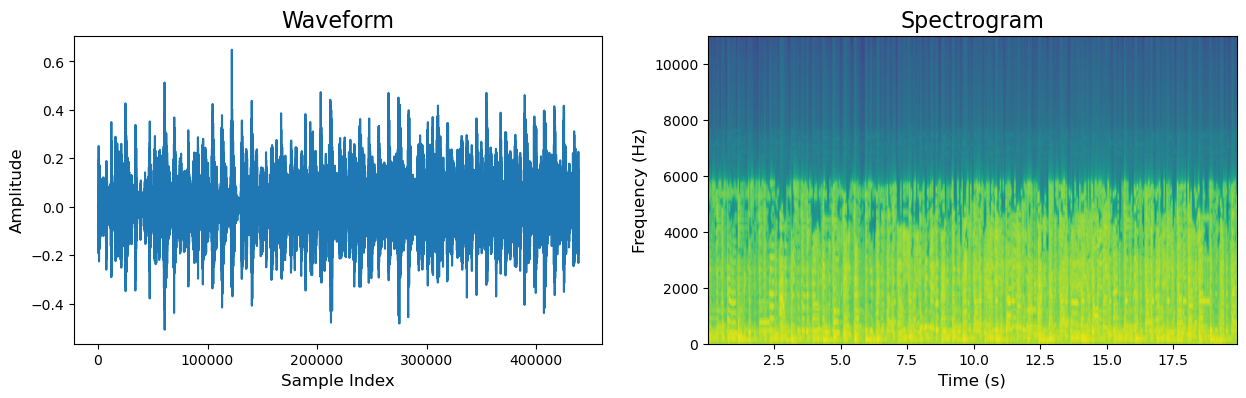

In [14]:
audioFile = df['filename'][0]

# Loading audio file
waveform, sampleRate = librosa.load(audioFile)

# Displaying audio
print('Class : Blues\n')
ipd.display(ipd.Audio(waveform, rate = sampleRate))

# Displaying waveform
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(waveform)
plt.title('Waveform', fontsize = 16)
plt.xlabel('Sample Index', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)

# Displaying spectrogram
plt.subplot(1, 2, 2)
plt.specgram(waveform, Fs = sampleRate)
plt.title('Spectrogram', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Frequency (Hz)', fontsize = 12)

plt.show()

In [15]:
def extractFeatures(audioFile):
    try:
        # Loading audio file
        waveform, sr = librosa.load(audioFile)
        
        # Trimming silence
        waveform, _ = librosa.effects.trim(waveform)
        
        # Extracting features using VGGish
        return vggish(waveform).numpy()
    except:
        return None

In [18]:
data = []

# Iterar sobre la columna 'filename' del DataFrame
for filePath in tqdm(df['filename'], desc='Processing audio files'):
    # Verificar si el archivo existe
    if os.path.exists(filePath):
        features = extractFeatures(filePath)
        
        if features is not None:
            # Agregar las características y el nombre del archivo (o etiqueta si existe otra columna) al DataFrame
            #data.append([features, os.path.basename(filePath)])  # Aquí podrías agregar otra columna como 'label' si la tienes
            data.append([features, df.loc[df['filename'] == filePath, 'label'].values[0]])
    else:
        print(f"File not found: {filePath}")

df_features = pd.DataFrame(data, columns=['features', 'label'])

Processing audio files: 100%|██████████████████████████████████████████████████████| 4800/4800 [31:52<00:00,  2.51it/s]


In [20]:
df_features.to_csv('vggish_dataset.csv')

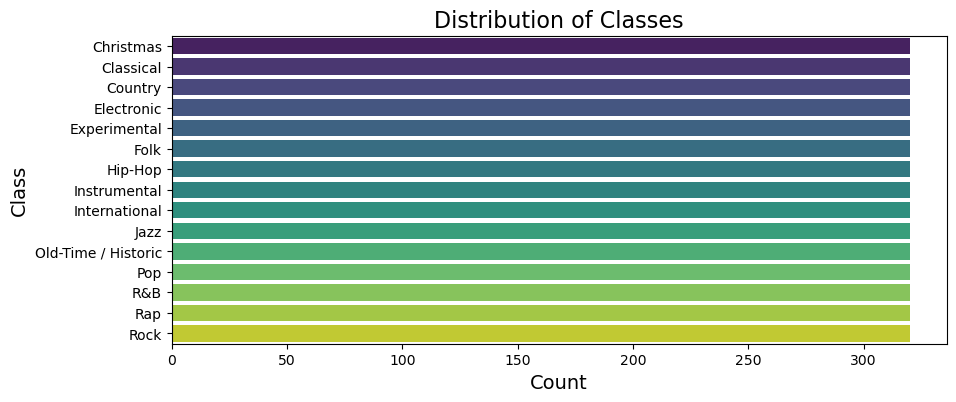

In [21]:
# Plotting count distribution of classes
plt.figure(figsize = (10, 4))
sns.countplot(y = df_features['label'], palette = 'viridis')
plt.title('Distribution of Classes', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Class', fontsize = 14)
plt.show()

In [23]:
x = df_features['features'].tolist()
x = pad_sequences(x, dtype = 'float32', padding = 'post', truncating = 'post')
x.shape

(4800, 43, 128)

In [24]:
encoder = LabelEncoder()
y = encoder.fit_transform(df_features['label'])
y = to_categorical(y)

In [25]:
trainX, testX, trainY, testY = train_test_split(x, y, random_state = 0)

In [30]:
model = Sequential([
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (43, 128, 1)),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(15, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Displaying model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 43, 128, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 21, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 21, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,310,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,331,215 (5.08 MB)

 Trainable params: 1,330,895 (5.08 MB)

 Non-trainable params: 320 (1.25 KB)

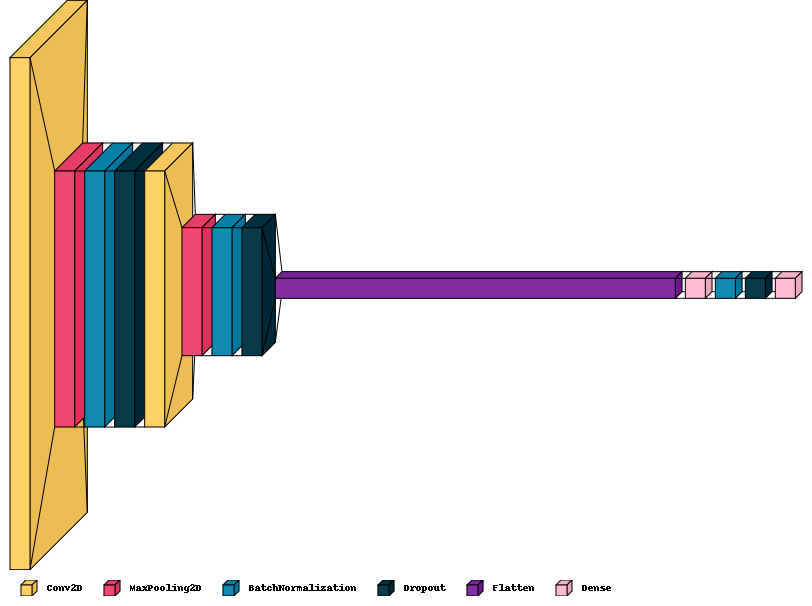

In [31]:
layered_view(model, legend = True)

In [32]:
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    min_delta = 0.001,
    restore_best_weights = True
)

In [33]:
history = model.fit(
    trainX, trainY,
    validation_data = (testX, testY),
    epochs = 50,
    callbacks = [earlyStopping]
)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.4493 - loss: 1.7349 - val_accuracy: 0.1333 - val_loss: 3.1776
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.6545 - loss: 1.0395 - val_accuracy: 0.1192 - val_loss: 3.1751
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.7162 - loss: 0.8540 - val_accuracy: 0.1542 - val_loss: 3.0075
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.7984 - loss: 0.6072 - val_accuracy: 0.3725 - val_loss: 2.1905
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.8952 - loss: 0.3958 - val_accuracy: 0.5617 - val_loss: 1.5073
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.9488 - loss: 0.2199 - val_accuracy: 0.5908 - val_loss: 1.4623
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9650 - loss: 0.1529 - val_accuracy: 0.6175 - val_loss: 1.5366
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.9767 - loss: 0

In [34]:
historyDf = pd.DataFrame(history.history)

<Axes: >

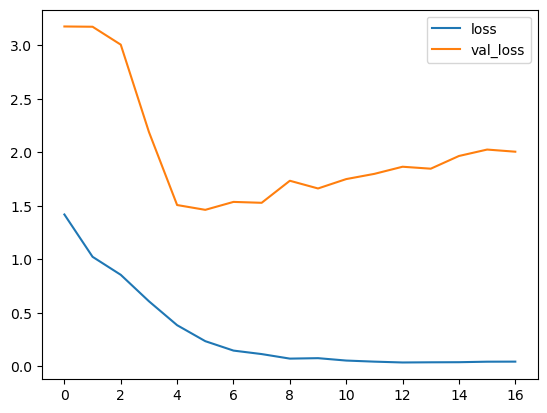

In [35]:
historyDf.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

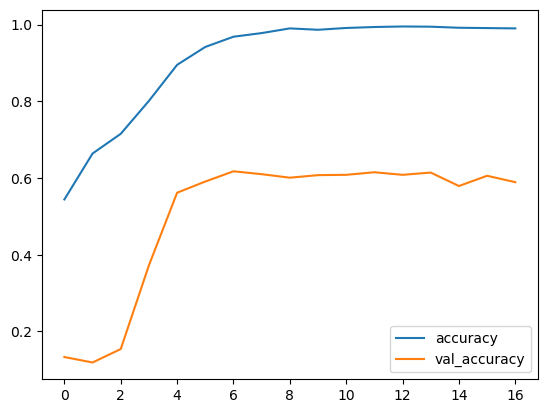

In [36]:
historyDf.loc[:, ['accuracy', 'val_accuracy']].plot()

In [37]:
score = model.evaluate(testX, testY)[1] * 100
print(f'Validation accuracy of model : {score:.2f}%')

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6290 - loss: 1.5063
Validation accuracy of model : 61.75%


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout

model2 = Sequential()
model2.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (43, 128, 1)))
model2.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model2.add(BatchNormalization())

model2.add(Conv2D(32, (3, 3), activation = "relu"))
model2.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model2.add(BatchNormalization())

model2.add(Conv2D(32, (2, 2), activation = "relu"))
model2.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model2.add(BatchNormalization())

model2.add(Conv2D(16, (1, 1), activation = "relu"))
model2.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(64, activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(15, activation="softmax"))

model2.summary()

C:\Users\INGRID GUEVARA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 41, 126, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 21, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 21, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 19, 61, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 10, 31, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 9, 30, 32)           │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 15, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 5, 15, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 5, 15, 16)           │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 3, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,951 (195.12 KB)

 Trainable params: 49,663 (194.00 KB)

 Non-trainable params: 288 (1.12 KB)

In [51]:
model2.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])

hist = model2.fit(
    trainX, trainY,
    validation_data = (testX, testY),
    epochs = 50,
    callbacks = [earlyStopping]
)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.2849 - loss: 2.2962 - val_accuracy: 0.1217 - val_loss: 2.6410
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.5557 - loss: 1.3405 - val_accuracy: 0.1492 - val_loss: 2.5261
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.5939 - loss: 1.1989 - val_accuracy: 0.3717 - val_loss: 1.8643
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.6688 - loss: 1.0271 - val_accuracy: 0.5200 - val_loss: 1.4101
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.6607 - loss: 0.9710 - val_accuracy: 0.5975 - val_loss: 1.2056
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.7044 - loss: 0.8827 - val_accuracy: 0.6117 - val_loss: 1.1952
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.6981 - loss: 0.8576 - val_accuracy: 0.6150 - val_loss: 1.2335
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.7170 - loss: 0

In [52]:
score2 = model2.evaluate(testX, testY)[1] * 100
print(f'Validation accuracy of model : {score:.2f}%')

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1216 - loss: 2.6407
Validation accuracy of model : 61.75%


In [53]:
historyDf2 = pd.DataFrame(hist.history)

<Axes: >

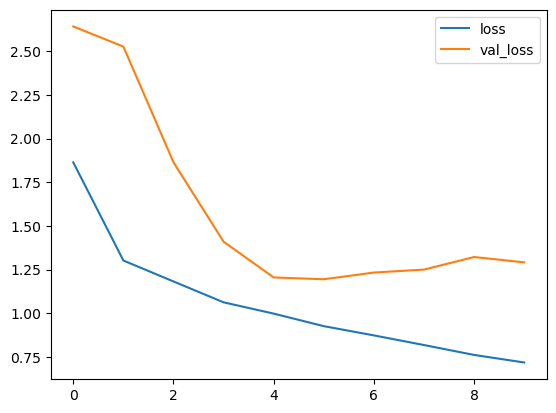

In [54]:
historyDf2.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

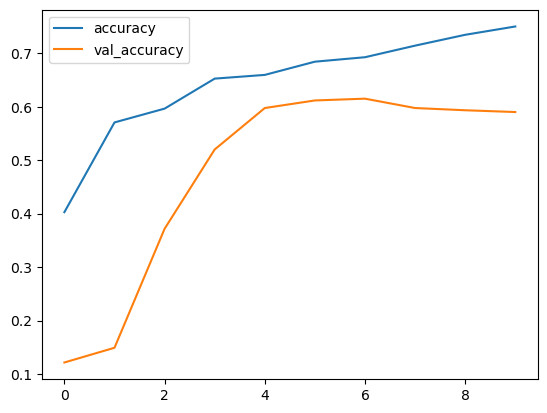

In [55]:
historyDf2.loc[:, ['accuracy', 'val_accuracy']].plot()